In [2]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
from collections import defaultdict 

from gensim.models.phrases import Phrases, Phraser
import multiprocessing
from gensim.models import Word2Vec
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

C:\Users\annas\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
df_vaccines = pd.read_csv('data/vacunes_100rt_en_clean.csv')

In [4]:
sent = [row.split() for row in df_vaccines['preprocessed_text']]

phrases = Phrases(sent, min_count=30, progress_per=10000)

bigram = Phraser(phrases)
sentences = bigram[sent]

word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

sorted(word_freq, key=word_freq.get, reverse=True)[:10]

list_tweets = [tweet.split() for tweet in df_vaccines.preprocessed_text]

INFO - 23:36:54: collecting all words and their counts
INFO - 23:36:54: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 23:36:54: PROGRESS: at sentence #10000, processed 159945 words and 111271 word types
INFO - 23:36:54: PROGRESS: at sentence #20000, processed 328803 words and 205278 word types
INFO - 23:36:54: collected 231854 token types (unigram + bigrams) from a corpus of 381707 words and 23200 sentences
INFO - 23:36:54: merged Phrases<231854 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 23:36:55: Phrases lifecycle event {'msg': 'built Phrases<231854 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.46s', 'datetime': '2021-06-15T23:36:54.994171', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'created'}
INFO - 23:36:55: exporting phrases from Phrases<231854 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
IN

In [5]:
# Set parameters                     
min_word_count = 40   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 5          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(list_tweets, workers=num_workers, \
            min_count = min_word_count, \
            window = context, sample = downsampling)

model.init_sims(replace=True)

model_name = "300features_40minwords_10context"
model.save(model_name)

INFO - 23:36:56: collecting all words and their counts
INFO - 23:36:56: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 23:36:56: PROGRESS: at sentence #10000, processed 159945 words, keeping 14062 word types
INFO - 23:36:56: PROGRESS: at sentence #20000, processed 328803 words, keeping 21420 word types
INFO - 23:36:56: collected 23258 word types from a corpus of 381707 raw words and 23200 sentences
INFO - 23:36:56: Creating a fresh vocabulary
INFO - 23:36:56: Word2Vec lifecycle event {'msg': 'effective_min_count=40 retains 1426 unique words (6.131223664975492%% of original 23258, drops 21832)', 'datetime': '2021-06-15T23:36:56.210932', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19043-SP0', 'event': 'prepare_vocab'}
INFO - 23:36:56: Word2Vec lifecycle event {'msg': 'effective_min_count=40 leaves 298088 word corpus (78.09340672295767%% of original 381707, drops 83619)', 'dateti

Training model...


INFO - 23:36:56: worker thread finished; awaiting finish of 3 more threads
INFO - 23:36:56: worker thread finished; awaiting finish of 2 more threads
INFO - 23:36:56: worker thread finished; awaiting finish of 1 more threads
INFO - 23:36:56: worker thread finished; awaiting finish of 0 more threads
INFO - 23:36:56: EPOCH - 1 : training on 381707 raw words (245137 effective words) took 0.2s, 1433407 effective words/s
INFO - 23:36:56: worker thread finished; awaiting finish of 3 more threads
INFO - 23:36:56: worker thread finished; awaiting finish of 2 more threads
INFO - 23:36:56: worker thread finished; awaiting finish of 1 more threads
INFO - 23:36:56: worker thread finished; awaiting finish of 0 more threads
INFO - 23:36:56: EPOCH - 2 : training on 381707 raw words (245266 effective words) took 0.2s, 1534800 effective words/s
INFO - 23:36:56: worker thread finished; awaiting finish of 3 more threads
INFO - 23:36:56: worker thread finished; awaiting finish of 2 more threads
INFO - 23:

#### ¿Qué palabras se parecen más entre sí?

**Nota**: algunas palabras, como las vacunas Moderna (_modern_) y Soberana (_sovereign_), han sido traducidas.

In [6]:
model.wv.most_similar(positive=['pandemic'])

[('must', 0.8520981073379517),
 ('measure', 0.8423560857772827),
 ('continue', 0.8072070479393005),
 ('economic', 0.7904917001724243),
 ('fight', 0.7897913455963135),
 ('solution', 0.7877576351165771),
 ('power', 0.7831941246986389),
 ('destroy', 0.7771292924880981),
 ('responsibility', 0.777040958404541),
 ('economy', 0.7754608988761902)]

In [7]:
# model.wv.most_similar(positive=['astrazeneca']) # astra, zeneca, modern
# model.wv.most_similar(positive=['modern']) # pfizer, zeneca, astra
# model.wv.most_similar(positive=['biontech']) # modern, pfizer
# model.wv.most_similar(positive=['pfizer']) # modern, biontech, sinovac

# model.wv.most_similar(positive=['sputnik']) # batch,  moscow, airline
# model.wv.most_similar(positive=['sovereign']) # cuba, cuban, abdala
model.wv.most_similar(positive=['sinovac']) # sinopharm, chile, brazil

[('sinopharm', 0.902186930179596),
 ('coronavac', 0.87959885597229),
 ('chile', 0.8721684217453003),
 ('third', 0.8682808876037598),
 ('pfizer', 0.8613390922546387),
 ('add', 0.8346672058105469),
 ('coronavirus', 0.8254811763763428),
 ('component', 0.8219013214111328),
 ('biontech', 0.8208997249603271),
 ('coreavirus', 0.8162201046943665)]

In [36]:
# model.wv.most_similar(positive=['risk']) # death
# model.wv.most_similar(positive=['death']) # contagion
model.wv.most_similar(positive=['people']) # die, many, person, dead

[('die', 0.8876270055770874),
 ('many', 0.8803619742393494),
 ('person', 0.8779960870742798),
 ('dead', 0.8665648102760315),
 ('young', 0.8592869639396667),
 ('daily', 0.8310681581497192),
 ('elderly', 0.8249793648719788),
 ('still', 0.8232818245887756),
 ('vaccinated', 0.8207705616950989),
 ('vaccinate', 0.8094465136528015)]

#### Comparemos unas vacunas con otras

In [37]:
model.wv.similarity('pfizer', 'astrazeneca')

0.83405995

In [38]:
model.wv.similarity('pfizer', 'biontech')

0.89392483

In [39]:
model.wv.similarity('pfizer', 'sputnik')

0.34034234

#### Podemos encontrar qué palabra "sobra"

In [40]:
model.wv.doesnt_match(['die', 'death', 'live'])

'live'

In [41]:
model.wv.doesnt_match(['pfizer', 'astrazeneca', 'sputnik'])

'sputnik'

In [42]:
model.wv.doesnt_match(['russia', 'china', 'france'])

'france'

#### Analogías:

"Sputnik" es a "Rusia" lo que "AstraZeneca" es a... 

In [48]:
model.wv.most_similar(positive=["astrazeneca", "sputnik"], negative=["russia"], topn=3)

[('thrombosis', 0.6445046067237854),
 ('zeneca', 0.6333101987838745),
 ('astra', 0.6302685141563416)]

In [43]:
def tsnescatterplot(model, word, word_list):

    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # add the vector of the target word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # retrieve most similar words
    close_words = model.wv.most_similar([word])
    
    # add the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # add each word vector to the array
    for wrd in word_list:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # reduce dimensionality with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # find t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Plot
    p1 = sns.regplot(data=df, x="x", y="y",
                     fit_reg=False, marker="o", scatter_kws={'s': 40, 'facecolors': df['color']})
    
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

Comparación de "Pfizer" (en rojo) con sus 10 palabras más similares (en azul) y con una lista de palabras a determinar (en verde).

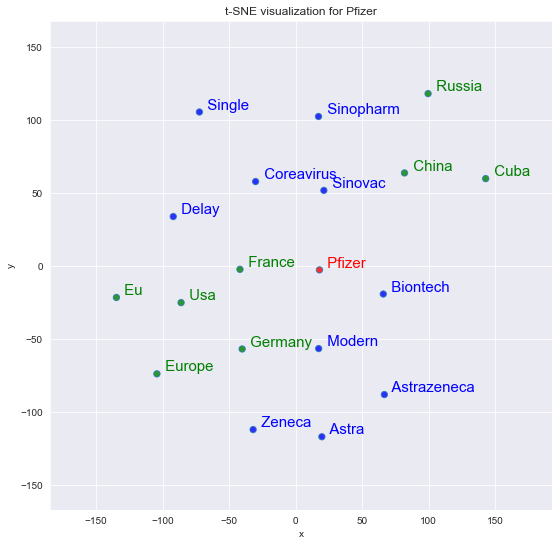

In [47]:
tsnescatterplot(model, 'pfizer', ['russia', 'china', 'cuba', 'france', 'usa', 'eu', 'europe', 'germany'])

Las 20 palabras más similares a "AstraZeneca" (en rojo), 1-10 en azul y 11-20 en verde.

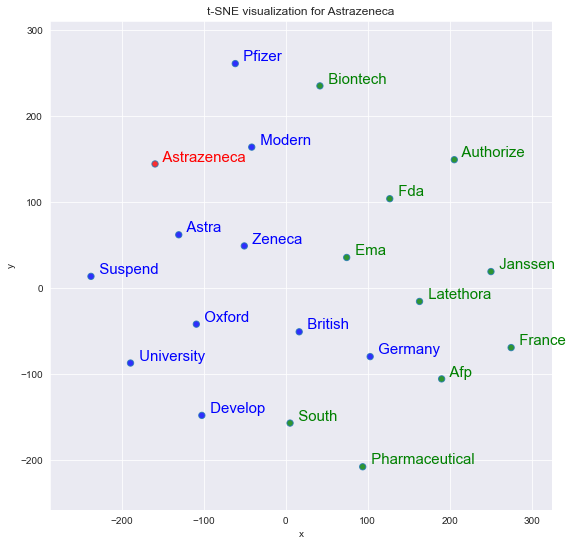

In [56]:
tsnescatterplot(model, 'astrazeneca', [t[0] for t in model.wv.most_similar(positive=['astrazeneca'], topn=20)][10:])

Las 10 palabras más similares a "Soberana" (_sovereign_) vs las 10 palabras menos similares

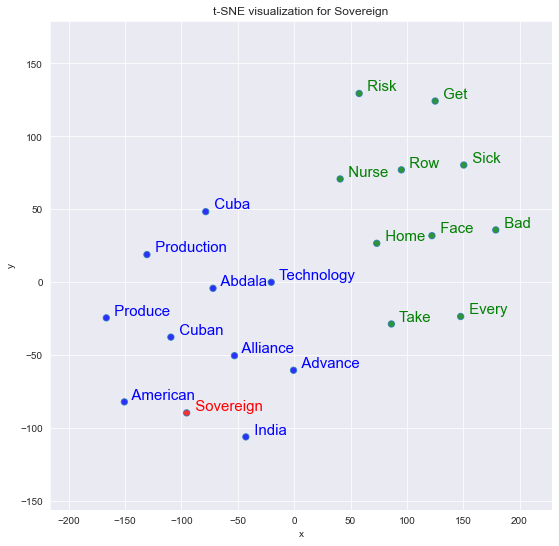

In [59]:
tsnescatterplot(model, 'sovereign', [t[0] for t in model.wv.most_similar(negative=['sovereign'], topn=20)][10:])